In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
!curl -LJO https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1 1440k    1 15458    0     0  46127      0  0:00:31 --:--:--  0:00:31 46281
100 1440k  100 1440k    0     0  1159k      0  0:00:01  0:00:01 --:--:-- 1161k


In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [6]:
features = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']

In [18]:
df = data[features].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [19]:
for col in list(df.dtypes[df.dtypes == 'object'].index):
    df[col] = df[col].str.lower().str.replace(' ', '_')

for col in list(df.dtypes[df.dtypes != 'object'].index):
    df[col] = df[col].fillna(0)

In [20]:
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920


In [21]:
avg_price = df['MSRP'].mean()
df['above_average'] = df['MSRP'].apply(lambda x: 1 if x>avg_price else 0)

In [22]:
df[['above_average','MSRP']]

,above_average,MSRP
0,1,46135
1,1,40650
2,0,36350
3,0,29450
4,0,34500
...,...,...
11909,1,46120
11910,1,56670
11911,1,50620
11912,1,50920


In [23]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)
len(df_full_train), len(df_test)

(9531, 2383)

In [24]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [27]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']
del df_train['MSRP']
del df_val['MSRP']
del df_test['MSRP']

In [32]:
df_train

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg
0,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,28,27
1,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,30,18
2,buick,regal,2016,259.0,4.0,automatic,sedan,27,19
3,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,25,17
4,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,25,17
...,...,...,...,...,...,...,...,...,...
7143,subaru,impreza,2015,148.0,4.0,manual,4dr_hatchback,33,24
7144,infiniti,qx50,2016,325.0,6.0,automatic,4dr_suv,24,17
7145,honda,fit,2017,130.0,4.0,automatic,4dr_hatchback,37,32
7146,audi,200,1991,162.0,5.0,automatic,sedan,20,16


In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
numerical = ['Engine HP','Engine Cylinders','city mpg']

In [31]:
for col in numerical:
    model = LogisticRegression(max_iter=1000)
    model.fit(df_train[col].values.reshape(-1,1),y_train) 

    preds = model.predict(df_train[col].values.reshape(-1,1))
    roc_auc = roc_auc_score(preds, y_train)

    print('For feature: ',col, 'ROC AUC is:', roc_auc)

For feature:  Engine HP ROC AUC is: 0.8570703331570597
For feature:  Engine Cylinders ROC AUC is: 0.7298785843129937
For feature:  city mpg ROC AUC is: 0.8636427271454571


In [31]:
### Question 1 : city mpg seems to have the highest AUC

## Question 2

In [33]:
train_dict = df_train.to_dict(orient='records')

In [34]:
dv = DictVectorizer(sparse=False)

In [35]:
X_train = dv.fit_transform(train_dict)

In [36]:
val_dict = df_val.to_dict(orient='records')

In [37]:
X_val = dv.transform(val_dict) 

In [38]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [39]:
y_pred = model.predict_proba(X_val)[:,1]

In [40]:
decision = (y_pred >= 0.5).astype(int)
decision

array([1, 0, 0, ..., 0, 1, 0])

In [41]:
roc_auc = round(roc_auc_score(decision, y_val),3)
roc_auc

0.919

In [ ]:
### It seems close to 0.979

## Question 3

In [42]:
scores = []
thresholds = np.linspace(0,1,101)
for t in thresholds:

    actual_positive = (y_val==1)
    actual_negative = (y_val==0)
    predict_positive = (y_pred>=t)
    predict_negative = (y_pred<t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    tpr = (tp)/(tp+fn)
    fpr = (fp)/(tn+fp)

    scores.append((t,tp,fp,fn,tn, tpr, fpr))

In [43]:
columns = ['threshold','tp','fp','fn','tn','tpr','fpr']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,654,1729,0,0,1.000000,1.000000
1,0.01,652,854,2,875,0.996942,0.493927
2,0.02,651,702,3,1027,0.995413,0.406015
3,0.03,651,618,3,1111,0.995413,0.357432
4,0.04,650,559,4,1170,0.993884,0.323308
...,...,...,...,...,...,...,...
96,0.96,254,1,400,1728,0.388379,0.000578
97,0.97,241,0,413,1729,0.368502,0.000000
98,0.98,217,0,437,1729,0.331804,0.000000
99,0.99,184,0,470,1729,0.281346,0.000000


In [44]:
df_scores['precision'] = df_scores.tp/(df_scores.tp+df_scores.fp)

In [45]:
df_scores['recall'] =  df_scores.tp/(df_scores.tp + df_scores.fn)

In [46]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall
0,0.00,654,1729,0,0,1.000000,1.000000,0.274444,1.000000
1,0.01,652,854,2,875,0.996942,0.493927,0.432935,0.996942
2,0.02,651,702,3,1027,0.995413,0.406015,0.481153,0.995413
3,0.03,651,618,3,1111,0.995413,0.357432,0.513002,0.995413
4,0.04,650,559,4,1170,0.993884,0.323308,0.537634,0.993884
...,...,...,...,...,...,...,...,...,...
96,0.96,254,1,400,1728,0.388379,0.000578,0.996078,0.388379
97,0.97,241,0,413,1729,0.368502,0.000000,1.000000,0.368502
98,0.98,217,0,437,1729,0.331804,0.000000,1.000000,0.331804
99,0.99,184,0,470,1729,0.281346,0.000000,1.000000,0.281346


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


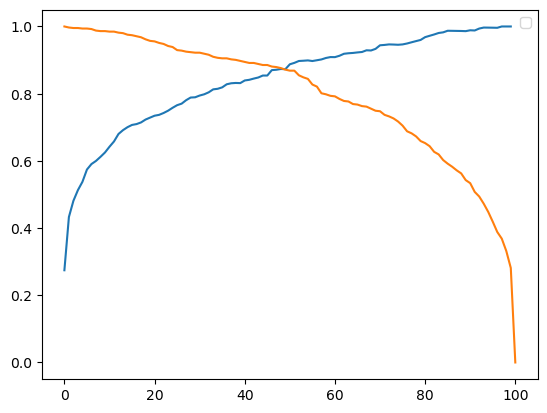

In [47]:
plt.plot(df_scores.precision)
plt.plot(df_scores.recall)

plt.legend()

In [ ]:
### at 0.48

## Question 4

In [48]:
df_scores['F1'] = (2*df_scores.precision*df_scores.recall)/(df_scores.precision + df_scores.recall)

In [49]:
f1_max = df_scores['F1'].max()
f1_max

0.8799380325329201

In [50]:
df_scores[df_scores['F1']==f1_max]

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall,F1
51,0.51,568,69,86,1660,0.868502,0.039907,0.89168,0.868502,0.879938


In [ ]:
# 0.52 appears correct for us

## Question 5

In [51]:
from sklearn.model_selection import KFold

In [53]:
def train(df,y_train, C=1.0):
    dicts = df.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=C)
    model.fit(X_train,y_train)

    return dv, model

In [54]:
def predict(df, dv, model):
   dicts = df.to_dict(orient='records')
    
   X = dv.transform(dicts)
   y_pred = model.predict_proba(X)[:,1]

   return y_pred 

In [55]:
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []
for train_idx, val_idx in kfold.split(df_full_train): 
    
       df_train = df_full_train.iloc[train_idx]
       df_val = df_full_train.iloc[val_idx]

       y_train = df_train.above_average.values
       y_val = df_val.above_average.values

       dv, model = train(df_train, y_train, C=1.0)
       y_pred = predict(df_val, dv, model)

       auc = roc_auc_score(y_val, y_pred)
       scores.append(auc)
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

1.000 +- 0.000


In [56]:
scores

[0.9999917498556224,
 0.9999986255882483,
 0.9999986057665496,
 0.9999999999999999,
 0.9999986124986125]

In [57]:
### the smallest: 0.003

## Question 6

In [58]:
from tqdm.auto import tqdm

In [63]:
n_splits = 5
for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train): 

       df_train = df_full_train.iloc[train_idx]
       df_val = df_full_train.iloc[val_idx]

       y_train = df_train.above_average.values
       y_val = df_val.above_average.values

       dv, model = train(df_train, y_train, C=C)
       y_pred = predict(df_val, dv, model)

       auc = roc_auc_score(y_val, y_pred)
       scores.append(auc)
    print((C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

(0.01, 0.9999975187418066, 2.933929986049027e-06)
(0.1, 0.9999975187418066, 2.933929986013594e-06)
(0.5, 0.9999975187418066, 2.9339299860572536e-06)
(10, 0.9999975187418066, 2.933929986049027e-06)


In [ ]:
# C = 0.1